<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Logistic Regression and Bad Initialization Value</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will see what happens when you use the root mean square error cost or total loss function and select a bad initialization value for the parameter values.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function the PyTorch way</a></li>
    <li><a href="#BGD">Train the Model:Batch Gradient Descent</a></li>
</ul>

<br>
<p>Estimated Time Needed: <strong>30 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries:

In [1]:
## Import the libraries we need for this lab

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

Helper functions 

The class <code>PlotErrorSurfaces</code> is just to help you visualize the data space and the Parameter space during training and has nothing to do with Pytorch. 

In [2]:
# Create class for plotting and the function for plotting

class PlotErrorSurfaces(object):
    ## Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        self.y, self.x = Y.numpy(), X.numpy()
    
        for ix, (w1, b1) in enumerate(zip(w, b)):
            for jx, (w2, b2) in enumerate(zip(w1, b1)):
                Z[ix, jx] = np.mean((self.y - (1 / (1 + np.exp(-1*w2 * self.x - b2)))) ** 2)    
            
        self.Z = Z
        self.w, self.b = w, b
        self.W, self.B = [], []
        self.LOSS = []
        self.n = 0
        if go:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     ## Setter
    def set_para_loss(self, model, loss):
        self.n += 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    ## Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    ## Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
## Plot the diagram
def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg:
        plt.legend()
    else:
        pass

Set the random seed:

In [3]:
## Set random seed

torch.manual_seed(0)

<h2 id="Makeup_Data">Get Some Data </h2>

Create the <code>Data</code> class

In [4]:
## Create the data class

class Data(Dataset):   
    ## Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
        
    ## Getter
    def __getitem__(self, ix):      
        return self.x[ix], self.y[ix]
    
    ## Get Length
    def __len__(self):
        return self.len

Make <code>Data</code> object

In [5]:
## Create Data object

data_set = Data()

<!--Empty Space for separating topics-->

<h2 id="Model_Cost">Create the Model and Total Loss Function (Cost)</h2>

Create a custom module for logistic regression:

In [10]:
## Create logistic_regression class

class LogisticRegression(nn.Module):
    
    ## Constructor
    def __init__(self, n_inputs):
        super().__init__() # super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    ## Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

Create a logistic regression object or model: 

In [11]:
## Create the logistic_regression result

model = LogisticRegression(1)

Replace the random initialized variable values with some predetermined values that will not converge:  

In [12]:
## Set the weight and bias

model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


Create a <code> PlotErrorSurfaces</code> object to visualize the data space and the parameter space during training:

<Figure size 432x288 with 0 Axes>

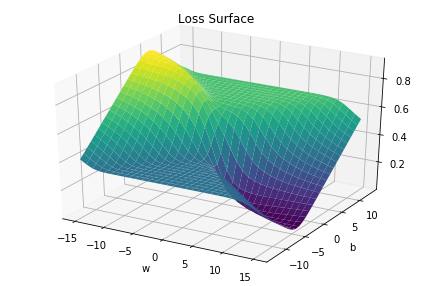

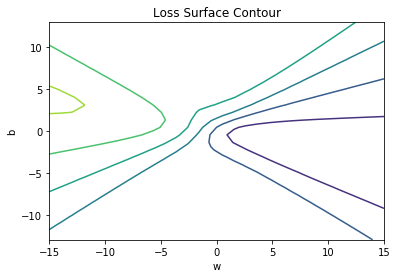

In [13]:
# Create the PlotErrorSurfaces object

get_surface = PlotErrorSurfaces(15, 13, data_set[:][0], data_set[:][1], 30)

Define the dataloader, the cost or criterion function, the optimizer: 

In [14]:
## Create dataloader object, crierion function and optimizer.

trainloader = DataLoader(dataset=data_set, batch_size=3)
criterion_rms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<a id="ref2"></a>
<h2 align=center>Train the Model via Batch Gradient Descent </h2>

Train the model

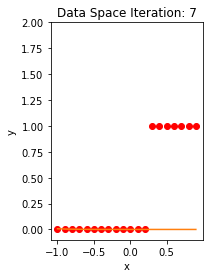

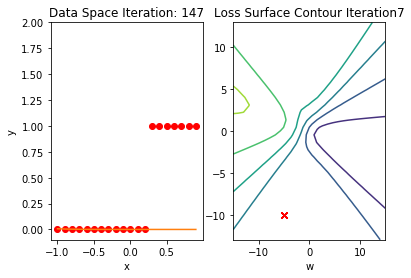

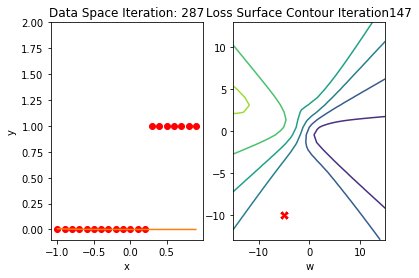

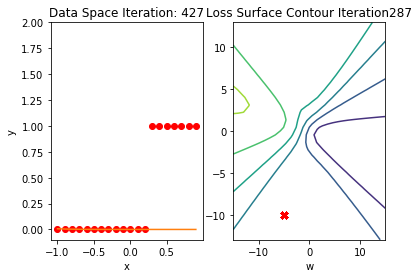

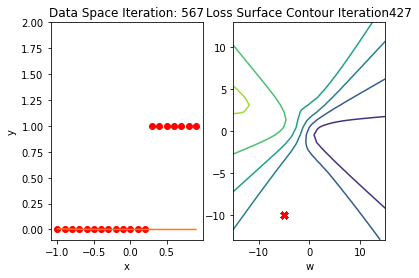

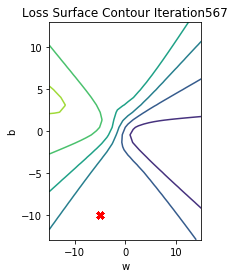

In [15]:
# Train the model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader: 
            yhat = model(x)
            loss = criterion_rms(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()

train_model(100)

Get the actual class of each sample and calculate the accuracy on the test data:

In [16]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(0.6500)


 Accuracy is 65% compared to 100% in the last lab using a good Initialization value. 

<!--Empty Space for separating topics-->

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.